<a href="https://colab.research.google.com/github/Murad1997/DS-Portfolio/blob/main/Data_analysis_and_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading
  - We use the electric vhicle dataset provided by the Washington State Department of Licensing and is available [here](https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2/about_data). This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).
  - The selected dataset from teh Washington State Department of Licensing (DOL) has `163K` rows and `17` columns. The detials of the columns are as follows:

   <table>
  <thead>
      <tr>
        <th>Column Name</th>
        <th>Description</th>
      </tr>
  </thead>
  <tbody>
      <tr>
        <td>VIN (1-10)</td>
        <td>The 1st 10 characters of each vehicle's Vehicle Identification Number (VIN).</td>
      </tr>
      <tr>
        <td>County</td>
        <td>This is the geographic region of a state that a vehicle's owner is listed to reside within. Vehicles registered in Washington state may be located in other states.</td>
      </tr>
      <tr>
        <td>City</td>
        <td>The city in which the registered owner resides.</td>
      </tr>
      <tr>
        <td>State</td>
        <td>This is the geographic region of the country associated with the record. These addresses may be located in other states.</td>
      </tr>
      <tr>
        <td>Postal Code</td>
        <td>The 5 digit zip code in which the registered owner resides.</td>
      </tr>
      <tr>
        <td>Model Year</td>
        <td>The model year of the vehicle, determined by decoding the Vehicle Identification Number (VIN).</td>
      </tr>
      <tr>
        <td>Make</td>
        <td>The manufacturer of the vehicle, determined by decoding the Vehicle Identification Number (VIN).</td>
      </tr>
      <tr>
        <td>Model</td>
        <td>The model of the vehicle, determined by decoding the Vehicle Identification Number (VIN).</td>
      </tr>
      <tr>
        <td>Electric Vehicle Type</td>
        <td>This distinguishes the vehicle as all electric or a plug-in hybrid.</td>
      </tr>
      <tr>
        <td>Clean Alternative Fuel Vehicle (CAFV) Eligibility</td>
        <td>This categorizes vehicle as Clean Alternative Fuel Vehicles (CAFVs) based on the fuel requirement and electric-only range requirement in House Bill 2042 as passed in the 2019 legislative session.</td>
      </tr>
      <tr>
        <td>Electric Range</td>
        <td>Describes how far a vehicle can travel purely on its electric charge.</td>
      </tr>
      <tr>
        <td>Base MSRP</td>
        <td>This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.</td>
      </tr>
      <tr>
        <td>Legislative District</td>
        <td>The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.</td>
      </tr>
      <tr>
        <td>DOL Vehicle ID</td>
        <td>Unique number assigned to each vehicle by Department of Licensing for identification purposes.</td>
      </tr>
      <tr>
        <td>Vehicle Location</td>
        <td>The center of the ZIP Code for the registered vehicle.</td>
      </tr>
      <tr>
        <td>Electric Utility</td>
        <td>This is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative. If the address for the registered vehicle falls into an area with overlapping electric power retail service territories then a single pipe | delimits utilities of same TYPE and a double pipe || delimits utilities of different types. We combined vehicle address and Homeland Infrastructure Foundation Level Database (HIFLD) (https://gii.dhs.gov/HIFLD) Retail_Service_Territories feature layer using a geographic information system to assign values for this field. Blanks occur for vehicles with addresses outside of Washington or for addresses falling into areas in Washington not containing a mapped electric power retail service territory in the source data.</td>
      </tr>
      <tr>
        <td>2020 Census Tract</td>
        <td>The census tract identifier is a combination of the state, county, and census tract codes as assigned by the United States Census Bureau in the 2020 census, also known as Geographic Identifier (GEOID). More information can be found here: https://www.census.gov/programs-surveys/geography/about/glossary.html#par_textimage_13 https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html</td>
      </tr>
  </tbody>
  </table>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re
import seaborn as sns
import warnings
sns.set_theme()

warnings.filterwarnings('ignore')
# %matplotlib inline

In [39]:
df = pd.read_csv('https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD')

## Changing the columns name for the better readibility
  - We change the name of all columns by converting to the lower case and replace white spaces with the underscores.

In [40]:
def func(s : str) -> str:
  s = s.replace('(', '').replace(')', '').replace(' ', '_').lower()
  return s

In [41]:
df.columns = df.columns.map(func)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163003 entries, 0 to 163002
Data columns (total 17 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   vin_1-10                                         163003 non-null  object 
 1   county                                           162999 non-null  object 
 2   city                                             162999 non-null  object 
 3   state                                            163003 non-null  object 
 4   postal_code                                      162999 non-null  float64
 5   model_year                                       163003 non-null  int64  
 6   make                                             163003 non-null  object 
 7   model                                            163003 non-null  object 
 8   electric_vehicle_type                            163003 non-null  object 
 9   clean_alternati

In [42]:
df.memory_usage(deep = True).sum()/(1024**2)

127.04358577728271

  - This dataset is quite large and needs `127 MBs` to store. It is much better to look into the datatypes of the columns and see if we can reduce the memory usage of this dataset without loosing the information about the data.
  - Many columns are stored as the python `object` which takes larger space. Therefore, we see whether we can convert these `object` datatypes to the datatypes which needs much smaller space.

In [43]:
df['state'].memory_usage(deep = True)/(1024**2)

9.17177677154541

  - We use `memory_usage` function to calculate the memory used by the `state` column. It seems that it is using `9+ MBs` of the memory. Therefore, it is important to dig further to analyze what is going on?
  - The description of the columns shows that the state column stores the name of the state, which is a string type. Let us find how many unique states we have in the `state` column.

In [44]:
df['state'].nunique()

45

  - The `state` column has only `45` states, therefore, instead of storing them as individual string we convert them to the `pandas` data type catageory.

In [45]:
df['state'].astype('category').memory_usage(deep = True)/(1024**2)

0.15912818908691406

  - After converting to the `pandas` `category` type, we have reduced the memory usage from `9+ MBs` to `0.16 MBs`.
  - Now let us directly convert all the `object` data types to the `category` data type except the `vin_1-10` column. Every value in the `vin_1-10` column is unique and converting to the `category` data type is not efficient.

In [46]:
l = list(df.columns[df.dtypes==object][1:])

In [47]:
dtypes_mapping = \
dict(zip(l, ['category']*len(l)))

In [48]:
df.astype(dtypes_mapping).memory_usage(deep = True).sum()/(1024 ** 2)

21.347376823425293

  - We see that after converting the `object` data type to the `category`, we have reduced the memory usage from `127 MBs` to `21.34 MB`.
  - Now we see whether we can reduce the memory usage further by converting the data types of the remaining columns.

In [49]:
non_object_columns = df.columns[df.dtypes!=object]
for col in non_object_columns:
  print(f'{col}, {df[col].nunique()}')

postal_code, 843
model_year, 22
electric_range, 102
base_msrp, 31
legislative_district, 49
dol_vehicle_id, 163003
2020_census_tract, 2094


  - From the above stats we can see that the number of unique values in the non-object columns is a very small as compared to the total number rows. Therefore, storing the repetitive values as the integers is not efficient. However, if we store them as the `category` datatype, we can have a significant reduction in the memory usage, but we have to change their data type to use them in machine learning model.

In [58]:
dtypes_mapping.update(
 {
    'postal_code': 'category',
    'model_year': 'category',
    'electric_range': 'category',
    'base_msrp': 'category',
    'legislative_district': 'category',
    # 'dol_vehicle_id': 'category',
    '2020_census_tract': 'category'
})
df.astype(dtypes_mapping).memory_usage(deep = True).sum()/ 1024**2

15.254378318786621

  - As most of the columns have repetitive values and converting them to the `category` datatype, we have significantly reduced the memory usage from `127 MBs` to `15.25 MBs` and this is significant reduction in the memory usage.

In [59]:
df = df.astype(dtypes_mapping)

# Exploratory Data Analysis

<Axes: xlabel='model_year'>

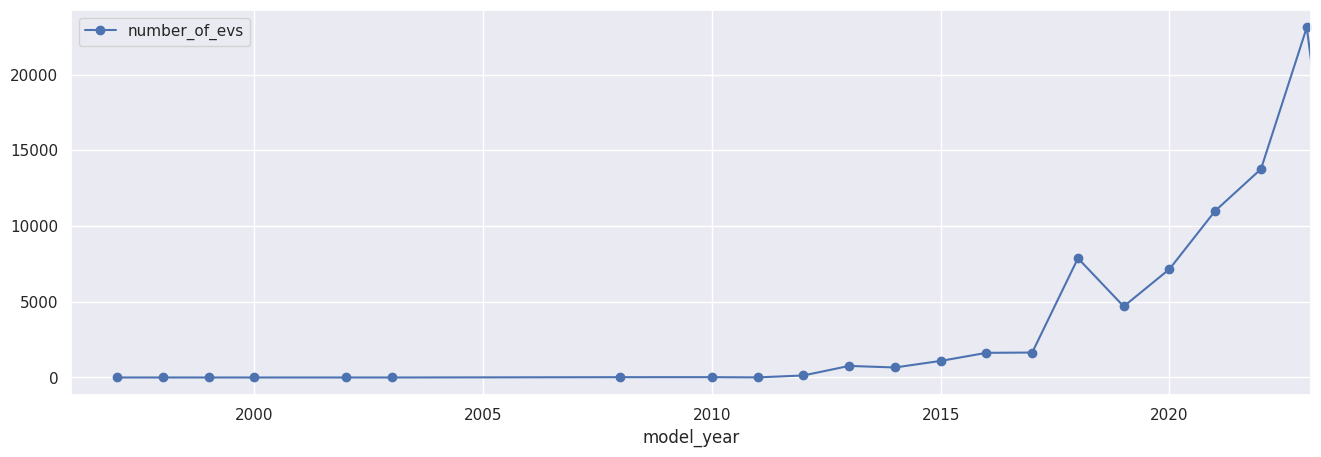

In [61]:
fig, ax = plt.subplots(figsize = (16, 5))
(df
 .loc[lambda df_: (df_.make == 'TESLA')]
 .groupby(by = ['model_year'], as_index = False)
 .agg(number_of_evs = ('model', 'count'))
 .astype('int')
 .plot(x = 'model_year', y = 'number_of_evs', style = '-o', xlim = [1996, 2023.1], ax = ax)
 )

  - In the figure above we show the number of Tesla cars registered with the Washington's DOL over the years. There has been a significant growth after `2015`. However, in `2019` there has been a drop as compared to the year `2018`, this could be explained by what happened at that time in US.
  

In [63]:
top10 = \
(df
 .groupby(by = ['make'])
 .agg(number_of_evs = ('model', 'count'))
 .reset_index()
 .sort_values('number_of_evs', ascending = False)[0:10]
 .make
 .tolist()
)

  - After listing the top-10 makers of the cars over the span of `22` years. We see that **TESLA** has the most registered cars.
  - **Note:** While listing the top-10 car makers we did not divide the `electric_vehicle_type`, as there are two types of electric vehicles in this dataset.

<Axes: xlabel='model_year'>

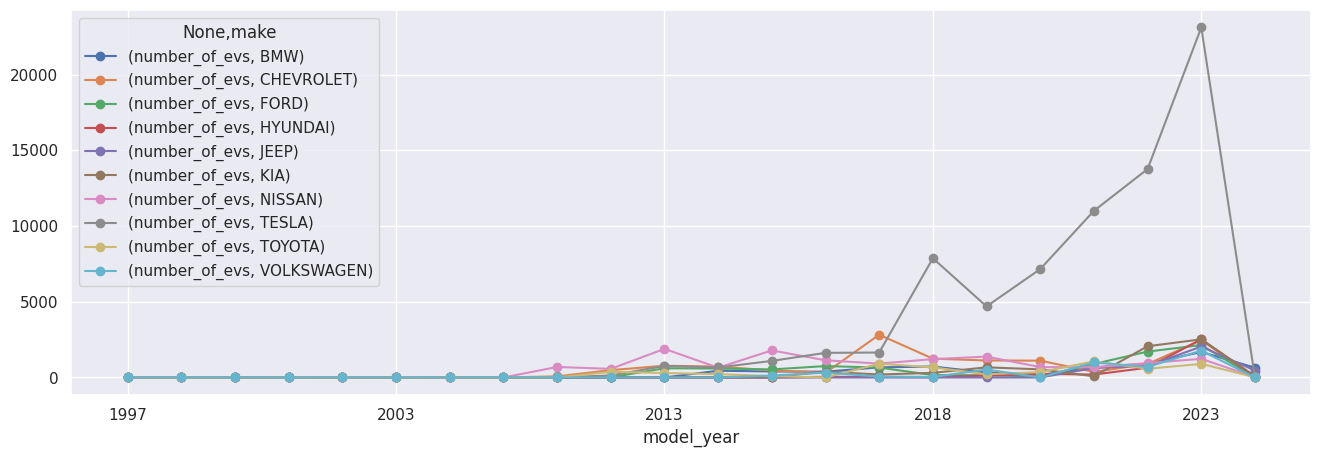

In [65]:
fig, ax = plt.subplots(figsize = (16, 5))
(df[lambda df_: df_.make.isin(top10)]
 .assign(make = lambda df_: df_.make.astype('string'))
 .groupby(by = ['model_year', 'make'])
 .agg(number_of_evs = ('model', 'count'))
 .unstack()
 .plot(y = ['number_of_evs'], style = '-o', ax = ax)
)

  - From the above plot we see that all the car makers have similar growth except the Tesla, as this is expected, Tesla being the leading in the electric vehicles (EVs) race.
  - So far our analysis have been based on the combined `electric_vehicle_type`. Now let us divide the data based on the different `electric_vehicle_type`.
  - Mainly, there are two types of the electric vehicles, one is the **Battery Electric Vehicle (BEV)** and the other is **Plug-in Hybrid Electric Vehicle (PHEV)**.
  - Let us first consider the **Battery Electric Vehicle (BEV)** type of cars and see which companies make these type of EVs. This [article](https://www.aptiv.com/en/insights/article/bev-phev-or-hev-the-differences-affect-the-architecture) explains the difference between the BEV and PHEV.

In [66]:
ev_type_index = 0 # select the ev_type by selecting the ev_type_index here and it will be used in the later part of the notebook.
ev_type = ['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)']

<Axes: ylabel='make'>

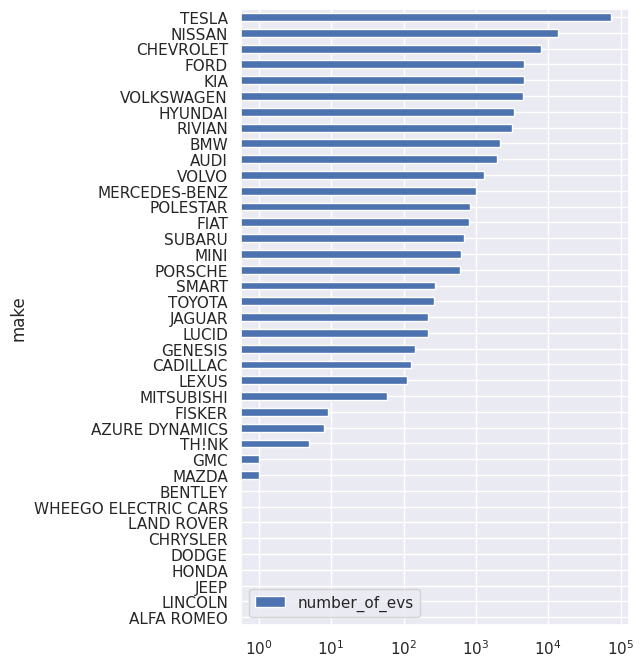

In [69]:
fig, ax = plt.subplots(figsize = (16, 5))

#top10_ev_type = \
(df[
    df['electric_vehicle_type'] == ev_type[ev_type_index]
    ]
 .groupby(by = 'make')
 .agg(number_of_evs = ('model', 'count'))
 .sort_values(by = 'number_of_evs')
 .plot(kind = 'barh', figsize = (5, 8), logx = True, ax = ax)
)

  - In the above plot, we can see that the Tesla being the learing car makers of the vechiles has the highest number of registered vehicles with the Washington's DOL.
  - Nissan has second highest number of registered vechiles with the Washington DOL.
  - Now let us the top-10 BEV makers and see the trend over the years.

In [75]:
top10_ev_type = \
(df[
    df['electric_vehicle_type'] == ev_type[ev_type_index]
    ]
 .groupby(by = 'make')
 .agg(number_of_evs = ('model', 'count'))
 .reset_index()
 .sort_values(by = 'number_of_evs', ascending = False)[0:10]
 .make
 .tolist()
)


<Axes: xlabel='model_year'>

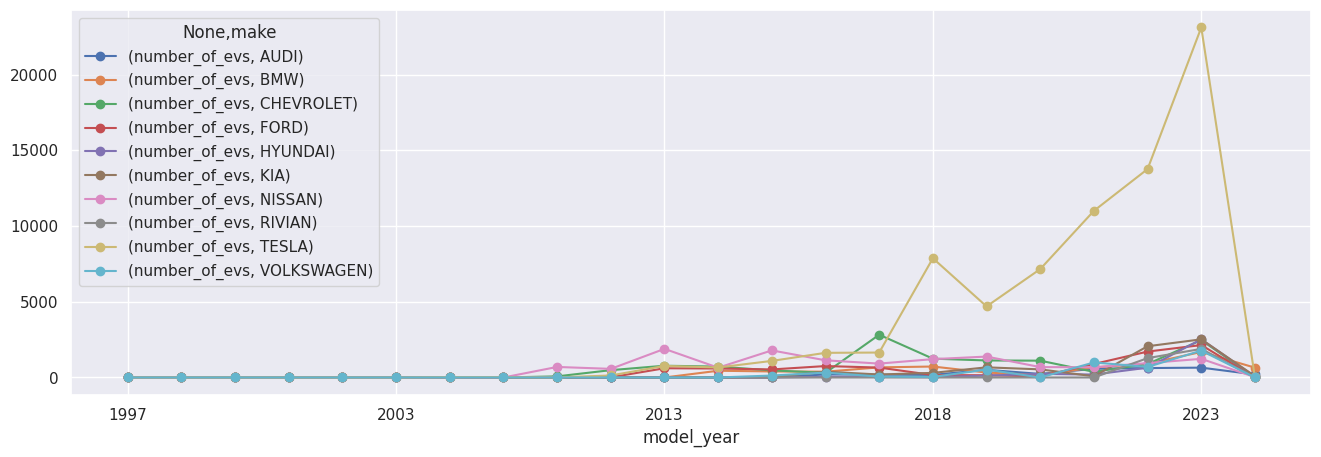

In [76]:
fig, ax = plt.subplots(figsize = (16, 5))
(df[lambda df_: df_.make.isin(top10_ev_type)]
 .assign(make = lambda df_: df_.make.astype('string'))
 .groupby(by = ['model_year', 'make'])
 .agg(number_of_evs = ('model', 'count'))
 .unstack()
 .plot(y = ['number_of_evs'], style = '-o', ax = ax)
)

  - As expected Tesla being the leading EVs maker in the industry has the highest number BEVs registered with the DOL Washington.
  

# Conclusion